In [2]:
# MNIST dataset downloaded from Kaggle :
# Source: https://www.kaggle.com/c/digit-recognizer/data

id = "1CzTCrwCNA3ozCfdR4lJmlurVlmMRt62m"
print("https://drive.google.com/uc?export=download&id=" + id)

https://drive.google.com/uc?export=download&id=1CzTCrwCNA3ozCfdR4lJmlurVlmMRt62m


In [3]:
!wget "https://drive.google.com/uc?export=download&id=1CzTCrwCNA3ozCfdR4lJmlurVlmMRt62m" -O mnist.csv

--2023-07-24 15:28:39--  https://drive.google.com/uc?export=download&id=1CzTCrwCNA3ozCfdR4lJmlurVlmMRt62m
Resolving drive.google.com (drive.google.com)... 142.250.101.113, 142.250.101.101, 142.250.101.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b223i9jecu3irdoli98jsvom4stfqdgg/1690212450000/10804243441129704195/*/1CzTCrwCNA3ozCfdR4lJmlurVlmMRt62m?e=download&uuid=f93d1c93-f065-4ed2-9159-5e499a23f39b [following]
--2023-07-24 15:28:41--  https://doc-0s-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b223i9jecu3irdoli98jsvom4stfqdgg/1690212450000/10804243441129704195/*/1CzTCrwCNA3ozCfdR4lJmlurVlmMRt62m?e=download&uuid=f93d1c93-f065-4ed2-9159-5e499a23f39b
Resolving doc-0s-ag-docs.googleusercontent.com (doc-0s-ag-docs.googleusercontent.com)... 142.251.2.132, 26

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
d0 = pd.read_csv('./mnist.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [6]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


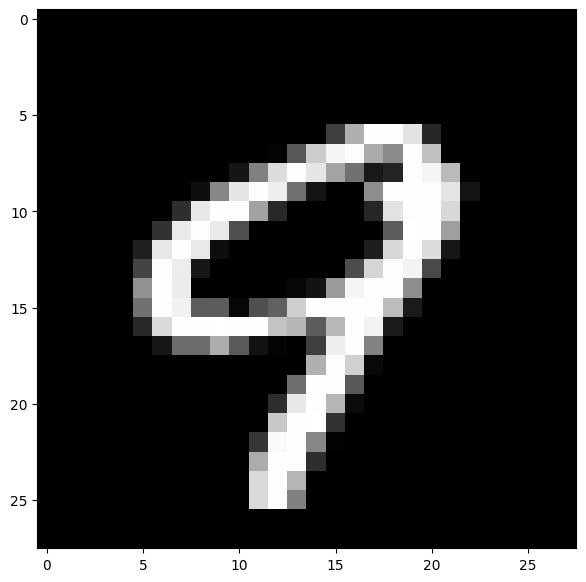

9


In [7]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data,  cmap = "gray")
plt.show()

print(l[idx])

### 2D-Visualization

In [8]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of all data-points.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [9]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [10]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [11]:
# finding the top two eigen-values and corresponding eigen-vectors
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to heigh value)
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
print(values)

Shape of eigen vectors =  (784, 2)
[435532.55785282 605719.29173629]


<ipython-input-11-9427f11347ed>:9: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(covar_matrix, eigvals=(782,783))


In [12]:
#vectors[:,0] represents the eigen vector corresponding to the 2nd eigen value.(First column in the vectors matrix)
#vectors[:,1] represents the eigen vector correspondign to the 1st eigen value.(Second column in the vectors matrix)

#Note : Eigen values are arranged in ascending order so the Eigen vectors too.


# converting the eigen vectors into (2,d) shape for ease of computation which we do it later.
vector = vectors.T

print("Updated shape of eigen vectors = ",vector.shape)
# Here, vectors[0] represent the eigen vector corresponding to the 2nd eigen value.
# Here, vectors[1] represent the eigen vector corresponding to the 1st eigen value.


Updated shape of eigen vectors =  (2, 784)


In [13]:
#Now, we need to swap the rows of the vector matrix such that the first row corresponds to the eigen vector with the largest eigen value and the second row corresponds to the eigen vector with the second largest eigen value.

vector[[0,1]]=vector[[1,0]]

In [14]:
# projecting the original data onto the eigen basis.
# Basically, we form a matrix with the eigen vectors in row order. Then, we do a matrix-vector multiplication between the matrix we formed and all the data vectors.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vector, sample_data.T)

print (" resultant new data points' shape ", vector.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultant new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [15]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.043558      -5.558661    1.0
1      19.305278       6.193635    0.0
2      -7.678775      -1.909878    1.0
3      -0.464845       5.525748    4.0
4      26.644289       6.366527    0.0


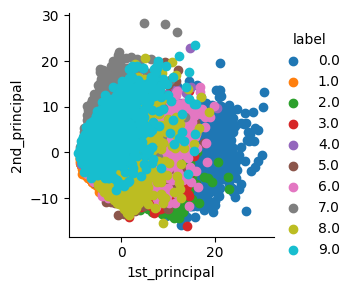

In [16]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label").map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### PCA using Scikit-Learn

In [17]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [18]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (15000, 2)


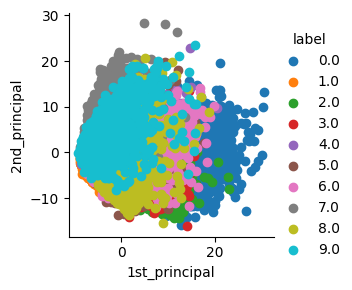

In [19]:
# attaching the label for each 2-d data point
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label").map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality redcution (not for visualization)

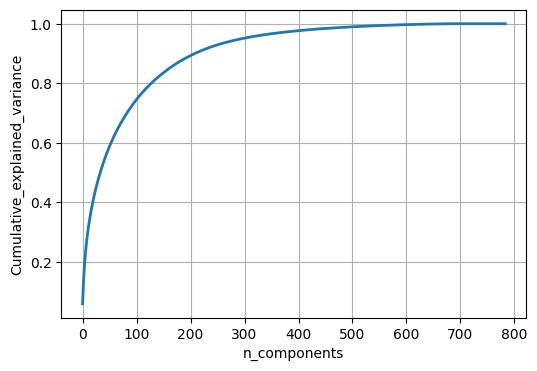

In [21]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

## t-SNE (covered in the future)
We will learn the mathematics underlying t-SNE in depth later in the program.

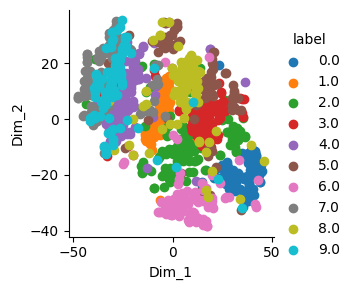

In [23]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2


tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label").map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [2]:
import numpy as np

def PCA(X, num_components):
    '''
    input:
    X -> is a 2D list Data which we have to apply PCA
    num_components -> number of dimensions to reduce to
    
    output:
    X_reduced -> a 2-D numpy array, containing the reduced matrix by num_components dimensions
    '''
    
    X = np.array(X)  # Convert input list to a NumPy array
    mean = np.mean(X, axis=0)  # Calculate the mean along the rows (axis 0)
    centered_X = X - mean  # Center the data
    covariance_matrix = np.cov(centered_X, rowvar=False)  # Calculate the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)  # Eigenvalue decomposition
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    top_k_eigenvectors = eigenvectors[:, :num_components]  # Select the top k eigenvectors
    X_reduced = np.dot(centered_X, top_k_eigenvectors)  # Project the data onto top k eigenvectors
    return X_reduced.round(2)

# Example usage:
X = [[1, 2, 3, 4,5,6,7], [ 8,9,10,11,12,13,14]]
num_components = 2
result = PCA(X, num_components)
print(result)


[[-9.26 -0.  ]
 [ 9.26  0.  ]]
